In [1]:
import numpy as np # we will use this later, so import it now

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

# Introducción:
Lo primero a realizar al trabajar con bokeh desde jupyter, es inicializar la interfaz de usuario para notebook
para ello se utiliza "output_notebook()"

In [2]:
output_notebook()

Loading BokehJS ...

# 1. Gráficas básicas: scatters y plots
Primero vamos a crear algunas gráficas de dispersión básicas, se pueden crear a partir de las siguientes 

    asterisk()
    cricle()
    cirle_cross()
    cirle_x()
    cross()
    diamond
    diamond_cross
    hex
    inverted_triangle()
    square()
    square_cross()
    square_x()
    triangle()
    x()



In [3]:
# Crear una figura de tamaño 400x400
p = figure(plot_width=400, plot_height=400,title='Circulos')

# Añadir dos vectores de datos como entradas en x, y.
p.circle([1, 2, 3, 4, 5], [3, 7, 2, 1, 4], size=15, line_color="navy", fill_color="blue", fill_alpha=0.5)

show(p) # Mostrar el resultado

In [4]:

p = figure(plot_width=400, plot_height=400,title='Hexágonos')

p.hex([1, 2, 3, 4, 5], [3, 7, 2, 1, 4], size=30, line_color="navy", fill_color="blue", fill_alpha=0.5)

show(p)

Ahora crearemos unas gráficas de lineas sencillas utilizando p.line(..)

In [5]:
p = figure(plot_width=400, plot_height=400, title="Gráfico de linea")

p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)

show(p) # show the results

# Manejar datos y ejes

A diferencia de matplotlib, bokeh permite realizar un manejo más inteligente de los ejes debido a que considera diferentes tipos de objetos tales como series de tiempo, nombres, entre otras. 

Para mostrar esto, tomemos el dataset glucose del sampledata de bokeh. Debido a que este está en un dataframe de Pandas, es posible tomar los datos que corresponden a fechas específicas utilizando "data.loc()", donde los week.index nos da las fechas y week.glucose nos da el valor de glucosa.

In [6]:
from bokeh.sampledata.glucose import data

# reduce data size to one week
week = data.loc['2010-10-01':'2010-10-08']

p = figure(x_axis_type="datetime", title="Rango de glucosa", plot_height=350, plot_width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Value'

p.line(week.index, week.glucose)

show(p)



In [7]:
Para ubicar un grid dentro de un plot "p" de bokeh, se debe utilizar "p.grid", 


SyntaxError: invalid syntax (<ipython-input-7-66110b6d8ef8>, line 1)

In [8]:
from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT
from bokeh.models import NumeralTickFormatter


def datetime(x):
    return np.array(x, dtype=np.datetime64)

p = figure(x_axis_type = "datetime",title="Precios de cierre de acciones")
p.grid.grid_line_alpha=0.3
p.xaxis.axis_label = 'Fecha'
p.yaxis.axis_label = 'Precio'

p.line(datetime(AAPL['date']), AAPL['adj_close'], color='red', legend='AAPL')
p.line(datetime(GOOG['date']), GOOG['adj_close'], color='blue', legend='GOOG')
p.line(datetime(IBM['date']), IBM['adj_close'], color='orange', legend='IBM')
p.line(datetime(MSFT['date']), MSFT['adj_close'], color='gray', legend='MSFT')
p.xaxis[0].formatter.days = '%m/%d/%Y'
p.xaxis.major_label_orientation = np.pi/3

p.yaxis.formatter = NumeralTickFormatter(format="$0.00")

show(p)

# 2. Imágenes y tiles

Para graficar tiles en bokeh, es necesario partir de dos vectores x, y y utilizando la función de utilería hexbin, la cual permite obtener los bins q y r necesarios para realizar la gráfica. 

In [9]:
from bokeh.palettes import Viridis256
from bokeh.util.hex import hexbin

n = 50000
x = np.random.standard_normal(n)
y = np.random.standard_normal(n)

bins = hexbin(x, y, 0.3)

color = [Viridis256[int(i)] for i in bins.counts/max(bins.counts)*255]

p = figure(tools="wheel_zoom,reset", match_aspect=True, background_fill_color='#440154')
p.grid.visible = False

p.hex_tile(bins.q, bins.r, size=0.1, line_color=None, fill_color=color)

show(p)

Para graficar imágenes de manera análoga a imshow en matplotlib, es necesario tener una matriz que puede ser creada a partir de dos vectores de una dimensión utilizando meshgrid

In [10]:
N = 500
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)
xx, yy = np.meshgrid(x, y)

img = np.sin(xx)*np.cos(yy)

p = figure(x_range=(0, 10), y_range=(0, 10))

p.image(image=[img], x=0, y=0, dw=10, dh=10, palette="Spectral11")

show(p)  

# 3. Personalizar las gráficas
Es posible configurar distintas opciones en las gráficas, definir bordes (outlines), utilizar distintos tipos de gráficas en un mismo plot y personalizar los glifos. 

In [11]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 7, 3]

p = figure(plot_width=400, plot_height=400)

p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "navy"
p.line(x, y, line_width=2)
p.annulus(x, y, 0.1,0.2)
show(p)


# 4. Selección de objetos en las imágenes

Configurar la distinción visual entre los objetos que se seleccionan y los que no es fácil en bokeh, únicamente es necesario configurar los parámetros del item seleccionado y del item no seleccionado.

In [12]:


p = figure(plot_width=400, plot_height=400, tools="tap", title="Seleccione un cícrulo")
renderer = p.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=50,

                    # Configurar para items seleccionados
                    selection_color="firebrick",

                    # Configurar para items no seleccionados
                    nonselection_fill_alpha=0.2,
                    nonselection_fill_color="grey",
                    nonselection_line_color="firebrick",
                    nonselection_line_alpha=1.0)

show(p)



# Flotar a través de los gráficos.

Es posible flotar a través de los gráficos, para ello, es posible añadir las herramientas de para fotar, para ello es necesario importar HoverTools y luego utilizar add_tools a la gráfica 

In [13]:
from bokeh.models.tools import HoverTool
from bokeh.sampledata.glucose import data

subset = data.loc['2010-10-06']

x, y = subset.index.to_series(), subset['glucose']

# Basic plot setup
p = figure(width=600, height=300, x_axis_type="datetime", title='Flotar sobre los puntos')

p.line(x, y, line_dash="4 4", line_width=1, color='gray')

cr = p.circle(x, y, size=20,
              fill_color="grey", hover_fill_color="firebrick",
              fill_alpha=0.05, hover_alpha=0.3,
              line_color=None, hover_line_color="white")

p.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

show(p)

# Transformaciones útiles

Algunas herramientas disponibles para transformar datos en bokeh, están disponibles en "bokeh.transform". Además, existen modelos de datos para trabajar. Inicialmente utilizaremos ColumnDataSource para trabajar más fácilmente con dataframes de pandas como se muestra a continuación.


In [14]:
from bokeh.models import ColumnDataSource
from bokeh.sampledata.iris import flowers as df

source = ColumnDataSource(df)

p = figure(plot_width=400, plot_height=400)
p.circle('petal_length', 'petal_width', source=source)
show(p)

En bokeh.transform se puede utilizar "cumsum" para realizar gráficos circulares a partir de datos creados en un dataframe. Una vez se tengan los datos, se puede realizar una conversión de los datos para ser representados como una porción un círculo. Luego, se pueden incluir dentro del figure los tooltips que corresponden a los nombres del diccionario y se añadirá hover. Para realizar este tipo de gráficos se utilizará p.wedge, con parámetros x=0, y=1, radio=0.4, luego se utiliza cumsum para sumar los valores de ángulo inicial y final y como source los datos. 

In [15]:
from math import pi
import pandas as pd
from bokeh.palettes import Category20c
from bokeh.transform import cumsum

x = { 'United States': 157, 'United Kingdom': 93, 'Japan': 89, 'China': 63,
      'Germany': 44, 'India': 42, 'Italy': 40, 'Australia': 35, 'Brazil': 32,
      'France': 31, 'Taiwan': 31, 'Spain': 29 }

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['color'] = Category20c[len(x)]

# represent each value as an angle = value / total * 2pi
data['angle'] = data['value']/data['value'].sum() * 2*pi

p = figure(plot_height=350, title="Gráficos circulares", toolbar_location=None,
           tools="hover", tooltips="@country: @value")

p.wedge(x=0, y=1, radius=0.4, 
        
        # use cumsum to cumulatively sum the values for start and end angles
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='country', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

Adicionalmente, se puede utilizar linear_cmap para asignarles colores a diferentes series de datos automáticamente. Como se hará en este caso, utilizando linear_cmap en diferentes ejes

In [16]:
from bokeh.transform import linear_cmap

N = 4000
data = dict(x=np.random.random(size=N) * 100,
            y=np.random.random(size=N) * 100,
            r=np.random.random(size=N) * 1.5)

p = figure()

p.circle('x', 'y', radius='r', source=data, fill_alpha=0.6,
        
         # color map based on the x-coordinate
         color=linear_cmap('r', 'Viridis256', 0, 100))

show(p) 

# Realizar anotaciones
Para realizar anotaciones se pueden añadir labels individuales a los puntos, esto también se puede configurar (leer documentación)

In [17]:
from bokeh.models.annotations import Label
from bokeh.plotting import figure

p = figure(x_range=(0,10), y_range=(0,10))
p.circle([2, 5, 8], [4, 7, 6], color="blue", size=10)

label = Label(x=2, y=4, x_offset=12, text="Primer Punto", text_baseline="middle")
label2 = Label(x=5, y=7, x_offset=12, text="Segundo Punto", text_baseline="middle")
label3= Label(x=8, y=6, x_offset=12, text="Tercer Punto", text_baseline="middle")

p.add_layout(label)
p.add_layout(label2)
p.add_layout(label3)

show(p)



Otra forma de realizar anotaciones más fácilmente para muchos labels, es utilizando un vector de strings que contenga las etiquetas.

In [18]:
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet


source = ColumnDataSource(data=dict(
    temp=[166, 171, 172, 168, 174, 162],
    pressure=[165, 189, 220, 141, 260, 174],
    names=['A', 'B', 'C', 'D', 'E', 'F']))

p = figure(x_range=(160, 175))
p.scatter(x='temp', y='pressure', size=8, source=source)
p.xaxis.axis_label = 'Temperature (C)'
p.yaxis.axis_label = 'Pressure (lbs)'

labels = LabelSet(x='temp', y='pressure', text='names', level='glyph',
                  x_offset=5, y_offset=5, source=source, render_mode='canvas')


p.add_layout(labels)

show(p)

# CustomJS for Property changes

Bokeh objects that have values associated can have small JavaScript actions attached to them using the js_on_change method. These actions (also referred to as "callbacks") are executed whenever the widget's value is changed. In order to make it easier to refer to specific Bokeh models (e.g., a data source, or a glyhph) from JavaScript, the CustomJS obejct also accepts a dictionary of "args" that map names to Python Bokeh models. The corresponding JavaScript models are made available automaticaly to the CustomJS code:

CustomJS(args=dict(source=source, slider=slider), code="""
    // easily refer to BokehJS source and slider objects in this JS code
    var data = source.data;
    var f = slider.value;
""")



In [19]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider

x = [x*0.005 for x in range(0, 201)]

source = ColumnDataSource(data=dict(x=x, y=x))

plot = figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

slider = Slider(start=0.1, end=6, value=1, step=.1, title="power")

update_curve = CustomJS(args=dict(source=source, slider=slider), code="""
    var data = source.data;
    var f = slider.value;
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    
    // necessary becasue we mutated source.data in-place
    source.change.emit();
""")
slider.js_on_change('value', update_curve)


show(column(slider, plot))

In [20]:
from random import random

x = [random() for x in range(500)]
y = [random() for y in range(500)]
color = ["navy"] * len(x)

s1 = ColumnDataSource(data=dict(x=x, y=y, color=color))
p = figure(plot_width=400, plot_height=400, tools="lasso_select", title="Select Here")
p.circle('x', 'y', color='color', size=8, alpha=0.4, source=s1, 
         selection_color="firebrick", selection_alpha=0.4)

s2 = ColumnDataSource(data=dict(xm=[0,1],ym=[0.5, 0.5]))
p.line(x='xm', y='ym', color="orange", line_width=5, alpha=0.6, source=s2)

s1.callback = CustomJS(args=dict(s1=s1, s2=s2), code="""
    var inds = s1.selected.indices;
    if (inds.length == 0)
        return;

    var ym = 0
    for (var i = 0; i < inds.length; i++) {
        ym += s1.data.y[inds[i]]
    }
    
    ym /= inds.length
    s2.data.ym = [ym, ym]

    // necessary becasue we mutated source.data in-place
    s2.change.emit();  
""")

show(p)

There are many kinds of interactions and events that can be connected to CustomJS callbacks.

    Widgets - Button, Toggle, Dropdown, TextInput, AutocompleteInput, Select, Multiselect, Slider, (DateRangeSlider), DatePicker,
    Tools - TapTool, BoxSelectTool, HoverTool,
    Selection - ColumnDataSource, AjaxDataSource, BlazeDataSource, ServerDataSource
    Ranges - Range1d, DataRange1d, FactorRange

Si desean ejemplos más avanzados o mayor documentación acerca de cada uno de los elementos, pueden consultar:
    https://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html

# Gráficas de barras
Para realizar gráficas de barras, se puede utilizar la función "vbar" incorporada en el objeto p. Aquí es posible configurar en x la etiqueta de cada una de las muestras, en top los conteos de cada muestra, en color el color determinado para el gráfico a realizar.

In [21]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

fruits = ['Granadillas', 'Peras', 'Manzanas', 'Ciruelas', 'Uvas', 'Moras']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=Spectral6))

p = figure(x_range=fruits, plot_height=250, y_range=(0, 9), title="Conteo de frutas")
p.vbar(x='fruits', top='counts', width=0.9, color='color', legend="fruits", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)



Para realizar gráficas apiladas, es posible utilizar hbar_stack, la cual recibe en el caso del ejemplo, un vector incluyendo los años y un diccionario en el que tienen como llaves los años y están asociados a los 6 tipos de frutas y sus respectivas cantidades.  El parámetro "source" deberá llevar un ColumnDataSource con los respectivos diccionarios de importaciones y exportaciones. El parámetro padding nos indica qué distancia tienen las barras apiladas del borde de la gráfica. 

In [22]:
from bokeh.palettes import GnBu3, OrRd3

years = ['2015', '2016', '2017']

exports = {'fruits' : fruits,
           '2015'   : [2, 1, 4, 3, 2, 4],
           '2016'   : [5, 3, 4, 2, 4, 6],
           '2017'   : [3, 2, 4, 4, 5, 3]}
imports = {'fruits' : fruits,
           '2015'   : [-1, 0, -1, -3, -2, -1],
           '2016'   : [-2, -1, -3, -1, -2, -2],
           '2017'   : [-1, -2, -1, 0, -2, -2]}

p = figure(y_range=fruits, plot_height=250, x_range=(-16, 16), title="Fruit import/export, by year")

p.hbar_stack(years, y='fruits', height=0.9, color=GnBu3, source=ColumnDataSource(exports),
             legend=["exportaciones de %s" % x for x in years])

p.hbar_stack(years, y='fruits', height=0.9, color=OrRd3, source=ColumnDataSource(imports),
             legend=["importaciones de %s" % x for x in years])

p.y_range.range_padding = 0.2
p.ygrid.grid_line_color = None
p.legend.location = "center_left"

show(p)

# Layouts
Permiten acomodar visualmente las gráficas en una página a través de:
- Columnas 
- Arreglos en malla
- Arreglos tabulados

In [32]:
# Importar las filas desde bokeh
from bokeh.layouts import row


source = ColumnDataSource(df)

p1 = figure(plot_width=400, plot_height=400)
p1.circle('petal_length', 'sepal_length', source=source)
p2 = figure(plot_width=400, plot_height=400)
p2.circle('petal_length', 'sepal_width', source=source)
p3 = figure(plot_width=400, plot_height=400)
p3.circle('petal_length', 'petal_width', source=source)

layout=row(p1,p2,p3)

show(layout)

In [36]:
# Importar las columnas desde bokeh
from bokeh.layouts import column

source = ColumnDataSource(df)

layout=column(p1,p2,p3)

show(layout)

Layouts combinadas

In [35]:
layout=row(column(p1,p2),p3)
show(layout)

Gridplots:
Para realizar gridplots se puede asignar una lista de columnas al layout. None puede ser útil para ubicar un espacio en un lugar donde no se requiera una gráfica. 

In [40]:
from bokeh.layouts import gridplot
layout = gridplot([[None, p1], [p2, p3]],toolbar_location=None)
show(layout)

In [50]:
# Import Panel from bokeh.models.widgets
from bokeh.models.widgets import Panel

# Create tab1 from plot p1: tab1
tab1 = Panel(child=p1, title='Latin America')

# Create tab2 from plot p2: tab2
tab2 = Panel(child=p2, title='Africa')

# Create tab3 from plot p3: tab3
tab3 = Panel(child=p3, title='Asia')

# Import Tabs from bokeh.models.widgets
from bokeh.models.widgets import Tabs

# Create a Tabs layout: layout
layout = Tabs(tabs=[tab1, tab2, tab3])

# Specify the name of the output_file and show the result
show(layout)


In [52]:
# Link the x_range of p2 to p1: p2.x_range
p2.x_range = p1.x_range

# Link the y_range of p2 to p1: p2.y_range
p2.y_range = p1.y_range

# Link the x_range of p3 to p1: p3.x_range
p3.x_range = p1.x_range

# Link the y_range of p4 to p1: p4.y_range

# Specify the name of the output_file and show the result

show(layout)


In [57]:
from bokeh.models import HoverTool

# Create a HoverTool object: hover
hover = HoverTool(tooltips=[('Frutas','@fruits')])

# Add the HoverTool object to figure p
p.add_tools(hover)

# Specify the name of the output_file and show the result
show(p)


# Alto nivel utilizando holoviews


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
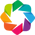

In [86]:
import holoviews as hv
from bokeh.sampledata.iris import flowers
irises = hv.Dataset(flowers).to(hv.Points, kdims=['petal_length','petal_width'], groupby=['species'])
hv.notebook_extension('bokeh')

In [87]:
%opts NdOverlay [legend_position='top_left']
irises.overlay()

:NdOverlay   [species]
   :Points   [petal_length,petal_width]

In [88]:
irises.overlay() + irises

:Layout
   .NdOverlay.I :NdOverlay   [species]
      :Points   [petal_length,petal_width]
   .HoloMap.I   :HoloMap   [species]
      :Points   [petal_length,petal_width]

# Redes y grafos

In [92]:
import networkx as nx
from bokeh.models import Range1d, Plot
from bokeh.models.graphs import from_networkx

G = nx.desargues_graph()

# We could use figure here but don't want all the axes and titles
plot = Plot(x_range=Range1d(-2, 2), y_range=Range1d(-2, 2))

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(G, nx.spring_layout, scale=1.8, center=(0,0))
plot.renderers.append(graph)

# Set some of the default node glyph (Circle) properties
graph.node_renderer.glyph.update(size=20, fill_color="orange")

# Set some edge properties too
graph.edge_renderer.glyph.line_dash = [2,2]

show(plot)

In [93]:
from bokeh.models import HoverTool
from bokeh.palettes import Category20_20

G = nx.desargues_graph() # always 20 nodes

# We could use figure here but don't want all the axes and titles
plot = Plot(x_range=Range1d(-2, 2), y_range=Range1d(-2, 2))

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(G, nx.spring_layout, scale=1.8, center=(0,0))
plot.renderers.append(graph)

# Add some new columns to the node renderer data source
graph.node_renderer.data_source.data['index'] = list(range(len(G)))
graph.node_renderer.data_source.data['colors'] = Category20_20

graph.node_renderer.glyph.update(size=20, fill_color="colors")

plot.add_tools(HoverTool(tooltips="index: @index"))

show(plot)

In [95]:
from bokeh.models.graphs import NodesAndLinkedEdges
from bokeh.models import Circle, HoverTool, MultiLine

G = nx.gnm_random_graph(15, 30)

plot = Plot(x_range=Range1d(-2, 2), y_range=Range1d(-2 ,2))

graph = from_networkx(G, nx.spring_layout, scale=1.8, center=(0,0))
plot.renderers.append(graph)

graph.node_renderer.glyph = Circle(size=25, fill_color='#2b83ba')
graph.edge_renderer.glyph = MultiLine(line_color="#cccccc", line_alpha=0.8, line_width=2)

# Hover verde para nodos y bordes
graph.node_renderer.hover_glyph = Circle(size=25, fill_color='#abdda4')
graph.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=4)

# Resaltar también los adyacentes
graph.inspection_policy = NodesAndLinkedEdges()

plot.add_tools(HoverTool(tooltips=None))

show(plot)

# Caso de estudio

Para el dataset: years-disability:
- Cargue el documento y trabaje con los datos de la manera que considere adecuada (dataframe,array de numpy,.. etc)
- Elimine las variables que no se pueden utilizar, realice preprocesamiento de datos


In [107]:
data=pd.read_csv("dataset/years-disability.csv")
keys=["Entity", "Code", "Year" ,"Years_Lived_With_Disability", "Health_expenditure_per_capita_PPP", "Total_population_Gapminder)"]
for key in keys:
    data = data.dropna(subset=[key])

In [108]:
data

Entity Code  Year  Years_Lived_With_Disability  \
56     Afghanistan  AFG  2002                         7.77   
57     Afghanistan  AFG  2003                         7.85   
58     Afghanistan  AFG  2004                         7.90   
59     Afghanistan  AFG  2005                         7.94   
60     Afghanistan  AFG  2006                         7.95   
...            ...  ...   ...                          ...   
22481     Zimbabwe  ZWE  2009                         5.51   
22482     Zimbabwe  ZWE  2010                         5.87   
22483     Zimbabwe  ZWE  2011                         6.07   
22484     Zimbabwe  ZWE  2012                         6.33   
22485     Zimbabwe  ZWE  2013                         6.52   

       Health_expenditure_per_capita_PPP  Total_population_Gapminder)  
56                             75.983514                   24639841.0  
57                             89.440178                   25678639.0  
58                             87.520903                   26693486.0  
59                             88.323062                   27614718.0  
60                             86.856016                   28420974.0  
...                                  ...                          ...  
22481                          76.941920                   12473992.0  
22482                          73.122119                   12571454.0  
22483                          96.088338                   12754378.0  
22484                         112.217797                   13013678.0  
22485                         119.733339                   13327925.0  

[3399 rows x 6 columns]